# Práctica Final de Machine Learning

### Predecir el precio del airbnb utilizando los datos disponibles en el dataset. 

## 1. Carga de datos y exploraremos la información

- Empezaremos por cargar todas las librerias que necesitamos.
- Eliminaremos las columnas que observamos de entrada que no son importantes como: información de Url, name, description, notes, interaction, etc

In [83]:
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [84]:
#cargamos el fichero y definimos el separador = ";" del archivo csv
airbnb_data = pd.read_csv("./data/airbnb-listings-extract.csv", sep=";") 

# Obtenemos las filas y columnas de nuestro dataSet
# Tenemos 14,780 registro con 89 columnas (variables) 
print(airbnb_data.shape) 

#lo configuramos para que nos muestre todas las columnas
pd.set_option('display.max_columns', None)

# Visualizamos 5 primeras filas
airbnb_data.head(5)         

# Eliminamos las columnas que consideramos innecesarias por la información que nos dan
airbnb_data = airbnb_data.drop(['Last Scraped','Listing Url','Scrape ID','Name','Summary','Space','Description','Experiences Offered','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url',
                                'Medium Url','Picture Url','XL Picture Url','Host ID','Host URL','Host Name','Host Location','Host About','Host Response Time','Host Response Rate','Host Acceptance Rate','Host Thumbnail Url','Host Picture Url',
                                'Host Neighbourhood','Host Listings Count','Host Total Listings Count','Host Verifications','Street','Neighbourhood Cleansed','Neighbourhood Group Cleansed','Market','Smart Location','Maximum Nights',
                                'Calendar Updated','Availability 30','Availability 60','Availability 90','Availability 365','Calendar last Scraped','First Review','Last Review','License','Jurisdiction Names','Calculated host listings count',
                                'Reviews per Month','Features','Geolocation'], axis=1)

# Obtenemos las columnas resultantes de nuestro dataSet
# Tenemos 14,780 registro con 37 columnas (variables) 
print(airbnb_data.shape) 

airbnb_data.head().T

(14780, 89)
(14780, 37)


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Host Since,2016-02-11,2016-11-08,2016-11-08,2010-05-25,2016-01-12
Neighbourhood,NaN,NaN,NaN,NaN,L'Antiga Esquerra de l'Eixample
City,Austin,Barcelona,Barcelona,Barcelona,Barcelona
State,TX,Barcelona,Barcelona,Barcelona,Catalunya
Zipcode,78733,08010,08008,08009,08036
Country Code,US,ES,ES,ES,ES
Country,United States,Spain,Spain,Spain,Spain
Latitude,30.337361,41.389683,41.393035,41.396967,41.388685
Longitude,-97.863277,2.172625,2.162173,2.167418,2.15515


## 2. Preparación de datos

- Dividiremos nuestros datos en train y test

In [85]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en train y test, donde test tendra un 20% de ellos, con shuffle=True queremos que aleatorice y con random_state=0 fijamos una semilla
train, test = train_test_split(airbnb_data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos en archivos csv nuestros datos separados
train.to_csv('./data/airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnnb_test.csv', sep=';', decimal='.', index=False)


# Cargamos el dataset de train para trabajar unicamente con él y así evitar usar los datos de test.
airbnb_train_data = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.') 
airbnb_train_data.head(5).T

Dimensiones del dataset de training: (11824, 37)
Dimensiones del dataset de test: (2956, 37)


,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Host Since,2015-04-13,2016-07-22,2016-07-17,2014-05-08,2012-02-06
Neighbourhood,Jerónimos,NaN,Carabanchel,NaN,Gaztambide
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,28
Zipcode,28014,28012,28025,28012,28015
Country Code,ES,ES,ES,ES,ES
Country,Spain,Spain,Spain,Spain,Spain
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.70534,-3.740374,-3.703052,-3.713716


## 2. Análisis exploratorio

- Analizaremos la estructura básica del dataset.
- Observar las columnas que cotenga nulos.
- Análisis de outliners
- Imputación
- Analizar valores únicos de ciertas columnas.
- Codificación de variables categóricas
- Visualización
- Eliminación de Outliners
- Correlación
- Eliminación de variables 
  

In [86]:
# Observamos los tipos de datos de cada columna 
airbnb_train_data.dtypes

ID                               int64
Host Since                      object
Neighbourhood                   object
City                            object
State                           object
Zipcode                         object
Country Code                    object
Country                         object
Latitude                       float64
Longitude                      float64
Property Type                   object
Room Type                       object
Accommodates                     int64
Bathrooms                      float64
Bedrooms                       float64
Beds                           float64
Bed Type                        object
Amenities                       object
Square Feet                    float64
Price                          float64
Weekly Price                   float64
Monthly Price                  float64
Security Deposit               float64
Cleaning Fee                   float64
Guests Included                  int64
Extra People             

In [87]:
# Vamos a ver las columnas que muestran nulls para despues analizarlas
airbnb_train_data.isnull().any()

ID                             False
Host Since                      True
Neighbourhood                   True
City                            True
State                           True
Zipcode                         True
Country Code                   False
Country                         True
Latitude                       False
Longitude                      False
Property Type                  False
Room Type                      False
Accommodates                   False
Bathrooms                       True
Bedrooms                        True
Beds                            True
Bed Type                       False
Amenities                       True
Square Feet                     True
Price                           True
Weekly Price                    True
Monthly Price                   True
Security Deposit                True
Cleaning Fee                    True
Guests Included                False
Extra People                   False
Minimum Nights                 False
H

In [88]:
# Mostramaos la cantidad de registros con Null por columna para ver de cuantos registros hablamos
airbnb_train_data.isnull().sum()

# Recordemos que en los datos de train contamos con 11,824 registros.
# En este caso podemos observar que la columna 'Has Availability' tienen un porcentaje muy alto de información faltante, por lo tanto es conveniente eliminar dicha columna
# De igual manera observamos que 'Weekly Price' y 'Monthly Price' también les falta bastante información y encambio la columna 'Price' es mínimo. Por esta razón debemos eliminar dichas columnas.
# Podemos eliminar la columna de 'Country' y quedarnos con 'Country Code' dado que esta última no tiene nulos.
# Eliminar todos las relacionadas con los Review Scores, dado que falta mucha información en todos los campos y sería un valor dificil de imputar porque es muy personalizado.
# Podriamos quitar las columnas de 'Neighbourhood','City','State','Zipcode' dado que las columnas 'latitude' y 'Longitude' no tienen nulos y son más exactas  
# 

ID                                 0
Host Since                         3
Neighbourhood                   4159
City                               4
State                            119
Zipcode                          398
Country Code                       0
Country                            1
Latitude                           0
Longitude                          0
Property Type                      0
Room Type                          0
Accommodates                       0
Bathrooms                         44
Bedrooms                          20
Beds                              37
Bed Type                           0
Amenities                        141
Square Feet                    11350
Price                             15
Weekly Price                    8943
Monthly Price                   8955
Security Deposit                6772
Cleaning Fee                    4850
Guests Included                    0
Extra People                       0
Minimum Nights                     0
H

In [89]:
# Eliminamos las columnas que consideramos que no serían de gran ayuda.
# Dejamos algunas columnas con varios nulos porque considero que son importante, así que vamos a analizar como utilizarlas
airbnb_train_data = airbnb_train_data.drop(['Has Availability','Neighbourhood','City','State','Zipcode','Country','Weekly Price','Monthly Price','Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
                                            'Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value'], axis=1)

# Obtenemos las nuevas filas y columnas de nuestro dataSet
# Tenemos 10,346 registros con 21 columnas (variables) 
print(airbnb_train_data.shape) 
airbnb_train_data.isnull().sum()

(11824, 21)


ID                         0
Host Since                 3
Country Code               0
Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accommodates               0
Bathrooms                 44
Bedrooms                  20
Beds                      37
Bed Type                   0
Amenities                141
Square Feet            11350
Price                     15
Security Deposit        6772
Cleaning Fee            4850
Guests Included            0
Extra People               0
Minimum Nights             0
Cancellation Policy        0
dtype: int64

In [90]:
# Observemos como se comportan nuestra columnas
airbnb_train_data.describe()

#Podemos observar que es probable la existancia de un outliner en 'Square Feet' por su valor máximo así como en 'Minimum Nights' o 'Extra People'

,ID,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights
count,1.182400e+04,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000
mean,1.025308e+07,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,73.712592,189.312154,32.073129,1.581614,7.637601,3.109946
std,5.566485e+06,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,71.624844,116.011858,31.278032,1.160518,12.373491,13.427477
min,1.986400e+04,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,5.510692e+06,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,34.000000,100.000000,15.000000,1.000000,0.000000,1.000000
50%,1.125754e+07,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,55.000000,150.000000,25.000000,1.000000,0.000000,2.000000
75%,1.531982e+07,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,87.000000,200.000000,40.000000,2.000000,15.000000,3.000000
max,1.858361e+07,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,969.000000,990.000000,662.000000,16.000000,500.000000,1125.000000


In [91]:
# 'Bathrooms' parece que tuvieran outliers por su máximos comparados con sus medias
filtro = airbnb_train_data['Bathrooms'] >= 7 
airbnb_train_data[filtro]

# Existen pocos registros podría ser outliner dado que no es muy coherente tener 7-8 baños para una propiedad con 1 habitación con 16 camas, aunque podrían ser tipo albergues.

,ID,Host Since,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Cancellation Policy
379,2880185,2013-03-21,ES,39.647013,3.282283,House,Entire home/apt,16,8.0,7.0,11.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,570.0,NaN,NaN,12,45,7,strict
1208,2053690,2013-03-21,ES,39.589815,2.883977,House,Entire home/apt,16,7.0,10.0,16.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,790.0,NaN,150.0,1,0,4,strict
3812,6791765,2015-06-11,ES,40.424855,-3.698790,Apartment,Private room,16,8.0,1.0,16.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,29.0,NaN,NaN,1,0,1,flexible
4142,16763469,2016-10-04,ES,40.415019,-3.712161,Hostel,Shared room,10,8.0,1.0,NaN,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,...",NaN,15.0,NaN,NaN,1,15,1,flexible
5775,1353121,2013-09-16,ES,39.653318,3.289088,House,Entire home/apt,15,7.5,6.0,6.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",6997.0,638.0,NaN,NaN,12,43,7,strict
7660,10604960,2012-11-20,ES,39.763534,2.713778,House,Entire home/apt,14,7.0,7.0,9.0,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kit...",NaN,685.0,250.0,NaN,1,0,7,super_strict_60
9422,16040733,2014-12-15,ES,40.427715,-3.708666,Hostel,Private room,2,8.0,1.0,16.0,Real Bed,"TV,Wireless Internet,Heating,Family/kid friend...",NaN,45.0,NaN,NaN,1,0,1,flexible
9791,18099923,2017-04-07,ES,40.421985,-3.696886,Hostel,Private room,1,7.0,7.0,7.0,Real Bed,"Wireless Internet,Breakfast,Elevator in buildi...",NaN,65.0,NaN,NaN,1,0,1,flexible
11053,3955511,2014-08-25,ES,39.596057,2.925690,Villa,Entire home/apt,12,7.0,8.0,8.0,Real Bed,"TV,Internet,Wireless Internet,Pool,Kitchen,Fre...",NaN,NaN,NaN,NaN,16,100,7,moderate


In [92]:
# 'Extra People' parece que tuviera varios outliers por su máximos comparados con sus medias
filtro = airbnb_train_data['Extra People'] > 100
airbnb_train_data[filtro]

# Podemos observar que existe mucha incongruencia comparado el espacio habitable con el número de personas extras permitido
# Considero que es una variable que podemos eliminar dado que tiene mucho ruido y creo que el precio de esta variable es fuera del precio del airbnb.

,ID,Host Since,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Cancellation Policy
321,7173032,2014-05-05,DK,55.667564,12.557252,Apartment,Entire home/apt,5,1.0,2.0,2.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen...",NaN,NaN,NaN,500.0,2,500,1,moderate
1112,3911337,2013-06-12,DK,55.684188,12.535544,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"Internet,Wireless Internet,Kitchen,Pets allowe...",NaN,444.0,NaN,223.0,2,112,3,strict
2360,13662617,2016-06-23,ES,40.430890,-3.700778,Apartment,Entire home/apt,2,1.5,1.0,1.0,Pull-out Sofa,"TV,Wireless Internet,Kitchen,Doorman,Elevator ...",NaN,55.0,200.0,30.0,2,276,2,moderate
3229,17718888,2016-02-07,ES,40.425791,-3.705214,Apartment,Private room,4,1.0,1.0,2.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",NaN,120.0,NaN,30.0,1,150,3,flexible
4211,17584746,2016-11-08,ES,41.389474,2.170624,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"Wireless Internet,Air conditioning,Wheelchair ...",NaN,100.0,200.0,50.0,2,105,1,super_strict_30
4281,1727101,2012-02-10,ES,40.410194,-3.671795,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"Wireless Internet,Kitchen,Free parking on prem...",NaN,NaN,NaN,100.0,1,250,5,flexible
5346,8407627,2015-06-11,ES,40.408846,-3.694527,Apartment,Entire home/apt,5,1.0,1.0,3.0,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Buzzer/w...",NaN,500.0,NaN,200.0,1,250,1,strict
5526,17584766,2016-11-08,ES,41.387598,2.171540,Apartment,Entire home/apt,6,2.0,2.0,3.0,Real Bed,"Wireless Internet,Air conditioning,Wheelchair ...",NaN,100.0,200.0,50.0,2,105,1,super_strict_30
6998,11134169,2016-02-08,ES,40.422412,-3.702625,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"Wireless Internet,Air conditioning,Kitchen,Ele...",NaN,75.0,300.0,35.0,2,274,3,moderate
8466,17584727,2016-11-08,ES,41.388179,2.171467,Apartment,Entire home/apt,6,2.0,2.0,2.0,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelcha...",NaN,100.0,200.0,50.0,2,105,1,super_strict_30


In [93]:
# 'Minimum Nights' parece que tuviera varios outliers por su máximos comparados con sus medias
filtro = airbnb_train_data['Minimum Nights'] > 180
airbnb_train_data[filtro]

# Podemos observar que existe un outliner dado que vemos que un solo un registro tiene mucha diferencia, observamos 4 registros con un mínimo de aprox 1 año pero 1 con 1,125 días.

,ID,Host Since,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Cancellation Policy
3120,13790852,2016-07-01,ES,40.410380,-3.709127,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,NaN,65.0,NaN,NaN,1,0,365,flexible
5652,7211478,2015-07-07,ES,40.389885,-3.641012,Apartment,Entire home/apt,3,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Air conditioning,Ki...",NaN,30.0,NaN,NaN,1,0,360,strict
8480,3757935,2014-02-16,ES,40.380981,-3.698861,House,Private room,1,1.0,1.0,1.0,Real Bed,"Internet,Wireless Internet,Kitchen,Buzzer/wire...",NaN,23.0,NaN,15.0,1,0,365,strict
10134,139839,2010-01-31,ES,40.431458,-3.683872,Apartment,Entire home/apt,3,2.0,3.0,4.0,Real Bed,"TV,Cable TV,Wireless Internet,Air conditioning...",1292.0,280.0,100.0,NaN,1,0,365,flexible
10448,844856,2012-12-15,ES,40.417070,-3.708815,Apartment,Entire home/apt,5,1.0,1.0,1.0,Real Bed,"TV,Internet,Wireless Internet,Air conditioning...",538.0,62.0,NaN,30.0,3,10,1125,strict


#### Imputación

- Las columans de 'Security Deposit' y 'Cleaning Fee' sino tiene valores les asignaremos 0
- Analizaremos diferentes columnas para ver sus valores únicos y detectar información incoherente.
- Vamos a imputar las columnas 'Bathrooms','Bedrooms' y 'Beds' con KNNImputer con los N vecinos mas cercanos
  

In [94]:
# vamos a suponer que las columans de 'Security Deposit' y 'Cleaning Fee' sino tienen valor quiere decir que no solicitan ni depósito ni cobran limpieza. Por lo tanto su valor sería cero
airbnb_train_data['Security Deposit'] = airbnb_train_data['Security Deposit'].fillna(0) 
airbnb_train_data['Cleaning Fee'] = airbnb_train_data['Cleaning Fee'].fillna(0) 

In [95]:
airbnb_train_data["Accommodates"].unique()

array([ 4,  1,  2,  3,  6, 10,  9,  7,  8,  5, 16, 11, 14, 12, 13, 15])

In [96]:
airbnb_train_data["Guests Included"].unique() 

array([ 1,  2,  3,  5,  4, 15,  7, 14, 12,  6,  8, 10,  9,  0, 16])

In [97]:
airbnb_train_data["Property Type"].unique() 

# En este caso es una variable categórica

array(['Apartment', 'Loft', 'House', 'Bed & Breakfast', 'Dorm', 'Chalet',
       'Condominium', 'Guesthouse', 'Hostel', 'Other', 'Villa',
       'Boutique hotel', 'Camper/RV', 'Casa particular', 'Townhouse',
       'Serviced apartment', 'Guest suite', 'Boat', 'Tent', 'Earth House',
       'Bungalow'], dtype=object)

In [98]:
airbnb_train_data["Room Type"].unique()

# En este caso es una variable categórica

array(['Entire home/apt', 'Shared room', 'Private room'], dtype=object)

In [99]:
airbnb_train_data["Bed Type"].unique()

# En este caso es una variable categórica

array(['Real Bed', 'Pull-out Sofa', 'Couch', 'Futon', 'Airbed'],
      dtype=object)

In [100]:
airbnb_train_data["Bathrooms"].unique()

array([1. , 1.5, 3. , 2. , nan, 0.5, 4. , 0. , 6. , 5.5, 8. , 2.5, 3.5,
       5. , 4.5, 7. , 6.5, 7.5])

In [101]:
#Como muestra valores inchoherentes vamos a redondear al multiplo de 0.5 más cercano
airbnb_train_data["Bathrooms"] = (airbnb_train_data["Bathrooms"] * 2).round() / 2

airbnb_train_data["Bathrooms"].unique()

array([1. , 1.5, 3. , 2. , nan, 0.5, 4. , 0. , 6. , 5.5, 8. , 2.5, 3.5,
       5. , 4.5, 7. , 6.5, 7.5])

In [102]:
airbnb_train_data["Bedrooms"].unique()

array([ 1.,  2.,  0.,  6.,  4.,  3.,  8.,  7.,  5., 10., nan])

In [103]:
#Como muestra valores inchoherentes vamos a redondear al número entero más cercano
airbnb_train_data["Bedrooms"] = airbnb_train_data["Bedrooms"].round()

airbnb_train_data["Bedrooms"].unique()

array([ 1.,  2.,  0.,  6.,  4.,  3.,  8.,  7.,  5., 10., nan])

In [104]:
airbnb_train_data["Beds"].unique()

array([ 2.,  8.,  1.,  3., nan,  4., 10.,  9.,  5.,  6.,  7., 14., 11.,
       12., 16., 15., 13.])

In [105]:
#Como muestra valores inchoherentes vamos a redondear al número entero más cercano
airbnb_train_data["Beds"] = airbnb_train_data["Beds"].round()

airbnb_train_data["Beds"].unique()

array([ 2.,  8.,  1.,  3., nan,  4., 10.,  9.,  5.,  6.,  7., 14., 11.,
       12., 16., 15., 13.])

In [106]:
airbnb_train_data["Amenities"].unique()
# Eliminaremos esta variable dado que no es correcto categorizarla en Tiene o No Amenidades y sería muy dificil codificarla

array(['TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hangers',
       'TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       'Internet,Wireless Internet,Wheelchair accessible,Pool,Kitchen,Free parking on premises,Doorman,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Smoke detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace',
       ...,
       'TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Iron,Laptop f

In [107]:
airbnb_train_data = airbnb_train_data.drop(['Amenities','Extra People'], axis=1)

airbnb_train_data.isnull().sum()
# En este caso aunque considero que la variable 'Square Feet' debería afectar mucho al precio debemos eliminarla porque existe un alto porcentaje de valores faltantes. Esto porque si decidimos imputar va a introducir mucho ruido y solo aportaría 
#información real

ID                         0
Host Since                 3
Country Code               0
Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accommodates               0
Bathrooms                 44
Bedrooms                  20
Beds                      37
Bed Type                   0
Square Feet            11350
Price                     15
Security Deposit           0
Cleaning Fee               0
Guests Included            0
Minimum Nights             0
Cancellation Policy        0
dtype: int64

In [108]:
from sklearn.impute import KNNImputer

columns_imputar = ['Bathrooms','Bedrooms','Beds'] # imputaremos con los 5 vecinos mas cercanos
datos_a_imputar = airbnb_train_data[columns_imputar]

# Creamos el objeto imputer definiendo el número de vecinos a utilizar
imputer = KNNImputer(n_neighbors=5) # create imputer object

# Imputamos
datos_imputados = imputer.fit_transform(datos_a_imputar)

# Reemplaza las columnas imputadas en el dataframe original
airbnb_train_data[columns_imputar] = pd.DataFrame(datos_imputados, columns=columns_imputar, index=airbnb_train_data.index)


In [109]:
# Podemos observar que los valores = NAN han sido imputados 
airbnb_train_data["Bathrooms"].unique()

array([1. , 1.5, 3. , 2. , 0.5, 4. , 1.2, 0. , 6. , 5.5, 8. , 2.5, 3.5,
       5. , 1.4, 4.5, 1.7, 7. , 1.8, 6.5, 7.5, 1.3, 2.7])

In [110]:
airbnb_train_data["Bedrooms"].unique()

array([ 1. ,  2. ,  0. ,  6. ,  4. ,  3. ,  8. ,  7. ,  5. , 10. ,  1.4,
        0.8,  2.2,  5.4,  3.2])

In [111]:
airbnb_train_data["Beds"].unique()

array([ 2. ,  8. ,  1. ,  3. ,  2.8,  3.2,  4. , 10. ,  9. ,  5. ,  6. ,
        7. , 14. , 11. , 12. , 16. ,  1.6, 15. ,  5.6, 13. ,  1.2,  6.2,
        5.2,  1.4,  7.6])

In [112]:
airbnb_train_data.isnull().sum()

ID                         0
Host Since                 3
Country Code               0
Latitude                   0
Longitude                  0
Property Type              0
Room Type                  0
Accommodates               0
Bathrooms                  0
Bedrooms                   0
Beds                       0
Bed Type                   0
Square Feet            11350
Price                     15
Security Deposit           0
Cleaning Fee               0
Guests Included            0
Minimum Nights             0
Cancellation Policy        0
dtype: int64

#### Codificación de variables categóricas

Vamos a codificar las variables categóricas identificadas como 'Country Code', 'Property Type', 'Room Type', 'Bed Type' y 'Cancellation Policy'

In [113]:
from sklearn import preprocessing

# Preparamos una variable por cada variable categórica
# Aplicamos codificación
# Guardamos en una nueva variable
country_code_type = preprocessing.LabelEncoder()
country_code_type.fit(airbnb_train_data['Country Code'])
airbnb_train_data['country_code_type_encoded'] = country_code_type.transform(airbnb_train_data['Country Code'])

property_type = preprocessing.LabelEncoder()
property_type.fit(airbnb_train_data['Property Type'])
airbnb_train_data['property_type_encoded'] = property_type.transform(airbnb_train_data['Property Type'])

room_type = preprocessing.LabelEncoder()
room_type.fit(airbnb_train_data['Room Type']) 
airbnb_train_data['room_type_encoded'] = room_type.transform(airbnb_train_data['Room Type'])

bed_type = preprocessing.LabelEncoder()
bed_type.fit(airbnb_train_data['Bed Type']) 
airbnb_train_data['bed_type_encoded'] = bed_type.transform(airbnb_train_data['Bed Type'])

cancellation_policy_type = preprocessing.LabelEncoder()
cancellation_policy_type.fit(airbnb_train_data['Cancellation Policy']) 
airbnb_train_data['cancellation_policy_type_encoded'] = cancellation_policy_type.transform(airbnb_train_data['Cancellation Policy'])

airbnb_train_data.head(5)


,ID,Host Since,Country Code,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Square Feet,Price,Security Deposit,Cleaning Fee,Guests Included,Minimum Nights,Cancellation Policy,country_code_type_encoded,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_type_encoded
0,5994463,2015-04-13,ES,40.407732,-3.684819,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,60.0,0.0,25.0,1,2,moderate,8,0,0,4,2
1,14136180,2016-07-22,ES,40.415802,-3.705340,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,NaN,50.0,0.0,15.0,1,1,flexible,8,0,0,4,0
2,15520134,2016-07-17,ES,40.389048,-3.740374,Apartment,Shared room,1,1.5,1.0,8.0,Real Bed,NaN,10.0,0.0,5.0,1,3,moderate,8,0,2,4,2
3,8809721,2014-05-08,ES,40.412814,-3.703052,Apartment,Private room,2,3.0,1.0,1.0,Real Bed,NaN,30.0,0.0,0.0,1,10,strict,8,0,1,4,4
4,1162707,2012-02-06,ES,40.438631,-3.713716,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,NaN,32.0,0.0,0.0,1,1,strict,8,0,1,4,4


----------------------------------------

In [114]:
#Crearemos una nueva variable para agregar el año donde el anfitrio empezo, dado que creo que es mas relevante el año que la fecha engeneral.

# Pasamos la variable a tipo datetime para poder obtener el año y guardarlo en un nueva variable
airbnb_train_data['Host Since'] = pd.to_datetime(airbnb_train_data['Host Since']) 
airbnb_train_data['host_year'] = airbnb_train_data['Host Since'].dt.year 


In [115]:
# Las columnas 'ID', 'Host Since', no aporta información, así que las eliminamos
# Eliminaremos las columnas 'Property Type','Room Type','Bed Type' y 'Cancellation Policy', porque vamos a trabajar con sus columnas respetivas ya codificadas.
# Observamos que la variable 'Square Feet' muestras muchos faltantes por lo tanto a pesar de ser una variable que consideramos importante sería muy dificil imputar y no crear demasiado ruido en la información. 
# Como afectaria mucho a nuestro modelo mejor la eliminaraemos también.

airbnb_train_data = airbnb_train_data.drop(['ID','Host Since','Property Type','Room Type','Bed Type','Cancellation Policy','Square Feet','Country Code'], axis=1)
airbnb_train_data.head(5).T

,0,1,2,3,4
Latitude,40.407732,40.415802,40.389048,40.412814,40.438631
Longitude,-3.684819,-3.705340,-3.740374,-3.703052,-3.713716
Accommodates,4.000000,4.000000,1.000000,2.000000,2.000000
Bathrooms,1.000000,1.000000,1.500000,3.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000,1.000000,1.000000
Price,60.000000,50.000000,10.000000,30.000000,32.000000
Security Deposit,0.000000,0.000000,0.000000,0.000000,0.000000
Cleaning Fee,25.000000,15.000000,5.000000,0.000000,0.000000
Guests Included,1.000000,1.000000,1.000000,1.000000,1.000000


Voy a crear 2 variables nuevas que considero podrían ser útiles. Serán 'has_cleaning_cost' y 'has_security_deposit'; seran binarias.

Con las variables nuevas y otras realizaremos un análisis exploratorio para enteneder la relación con la variable objetivo 'Price'. 

Para las varialbes binarias usaremos boxplot.

In [116]:
airbnb_train_data['has_cleaning_cost'] = np.where(airbnb_train_data['Cleaning Fee'] == 0, 0, 1)

airbnb_train_data['has_security_deposit'] = np.where(airbnb_train_data['Security Deposit'] == 0, 0, 1)


#### Visualización

Haremos representaciones gráficas para poder entender mejor los datos con histogramas.


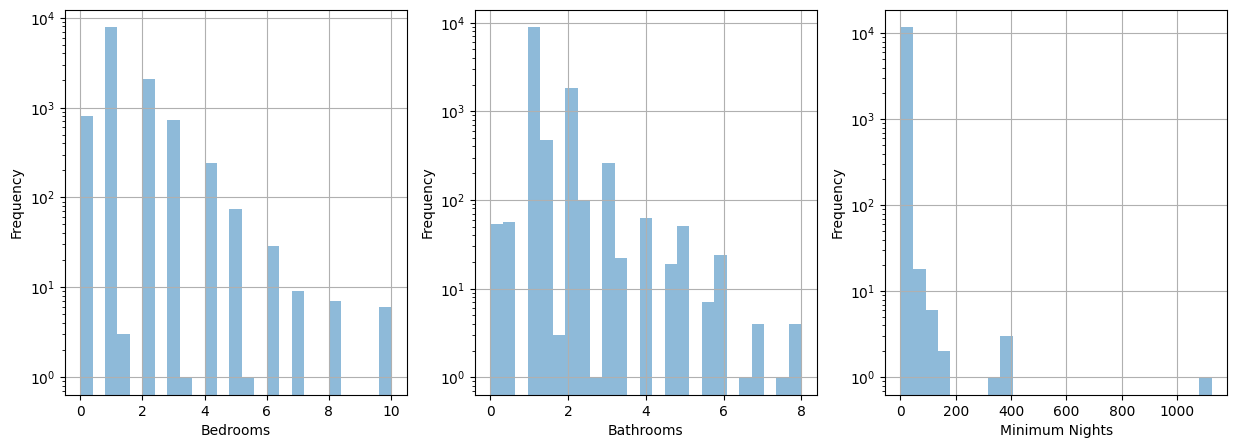

In [117]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_train_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_train_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)#plt.yscale("log")
plt.yscale("log")
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
airbnb_train_data['Minimum Nights'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
#plt.xscale("log")
plt.xlabel('Minimum Nights')

plt.show()

# Primera y segunda gráfica se comporante bastante bien, la mayoria tiene pocas habitaciones y/o baños. 
# En la último observamos un outliner muy marcado

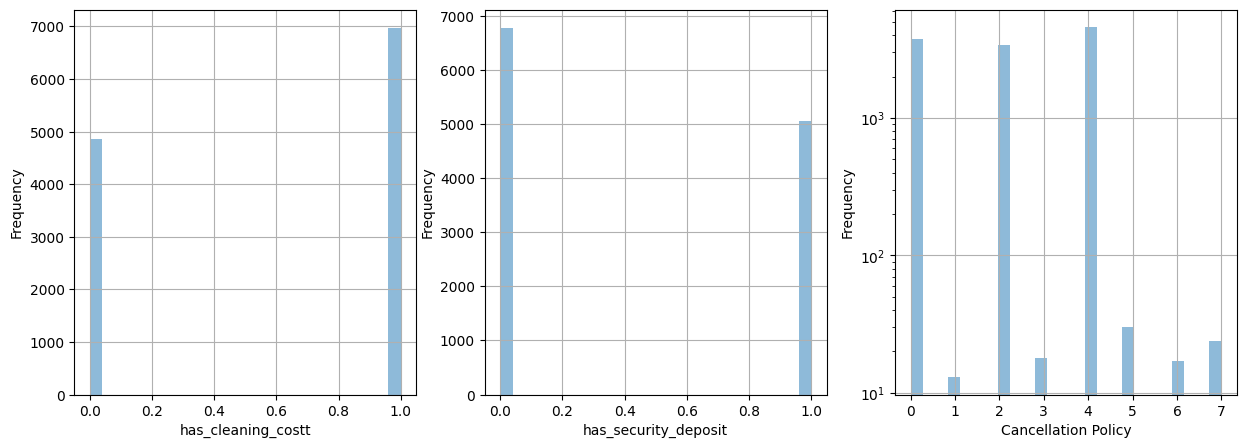

In [118]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_train_data['has_cleaning_cost'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('has_cleaning_costt')

plt.subplot(1,3,2)
airbnb_train_data['has_security_deposit'].plot.hist(alpha=0.5, bins=25, grid = True)#plt.yscale("log")
plt.xlabel('has_security_deposit')

plt.subplot(1,3,3)
airbnb_train_data['cancellation_policy_type_encoded'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Cancellation Policy')

plt.show()

# Podemos ver que muchos alojamientos cobran un precio por limpieza y que predominan los alojamientos que no cobran depósito
# En cuanto 'Cancellation Policy' observamos que 3 de ellas tienen la mayor cantidad de registro

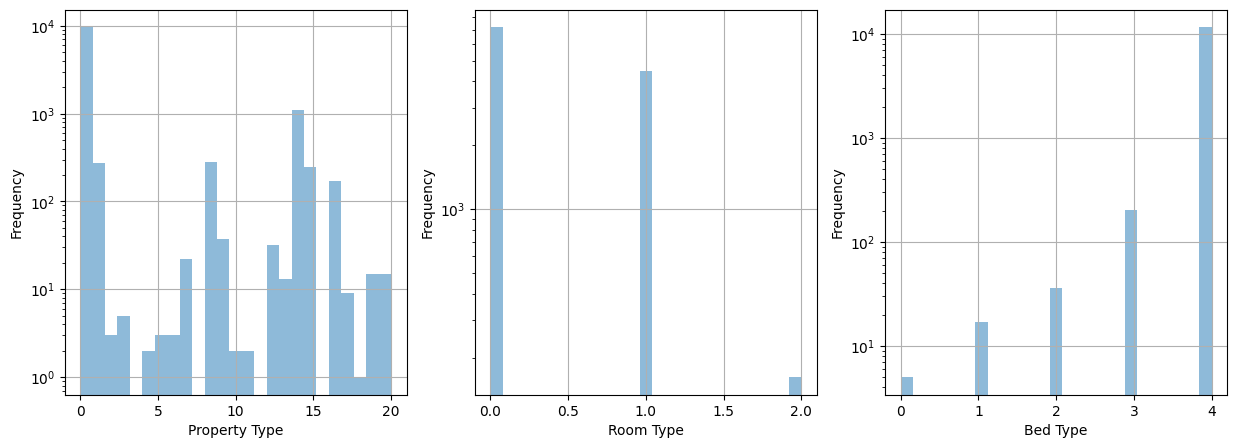

In [119]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_train_data['property_type_encoded'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Property Type')

plt.subplot(1,3,2)
airbnb_train_data['room_type_encoded'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Room Type')

plt.subplot(1,3,3)
airbnb_train_data['bed_type_encoded'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.yscale("log")
plt.xlabel('Bed Type')

plt.show()

# En estas gráficas podemos observar que como son las distribuciones para las siguientes variables categoricas.

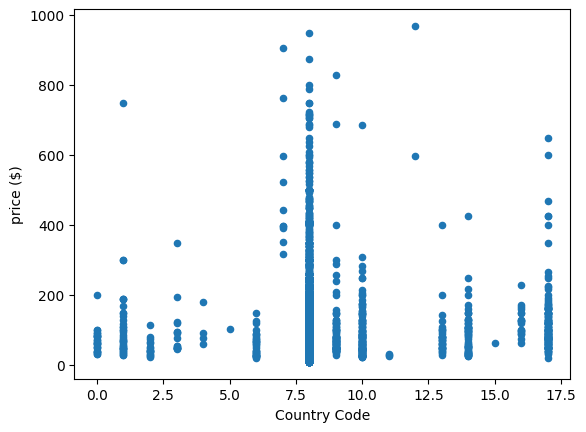

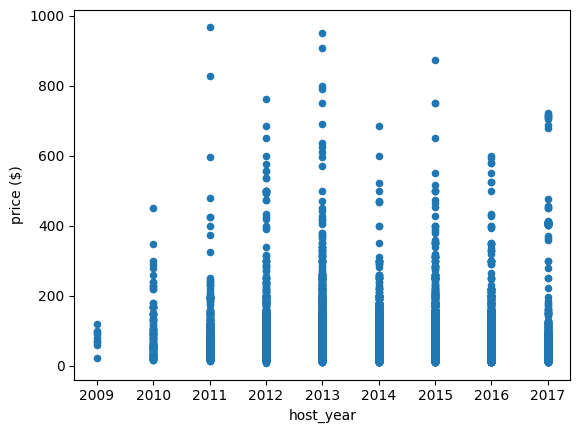

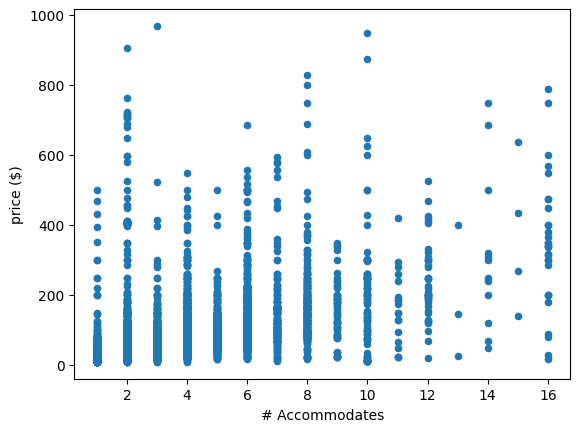

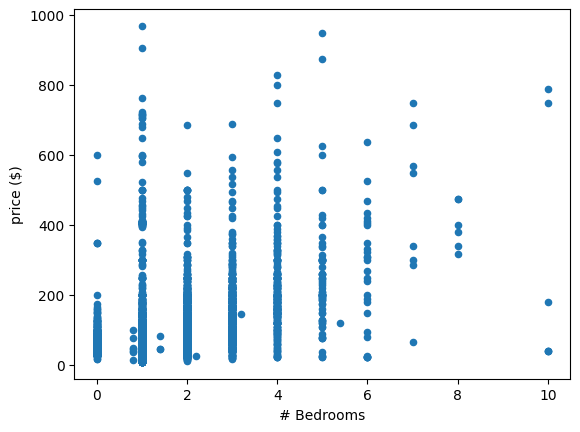

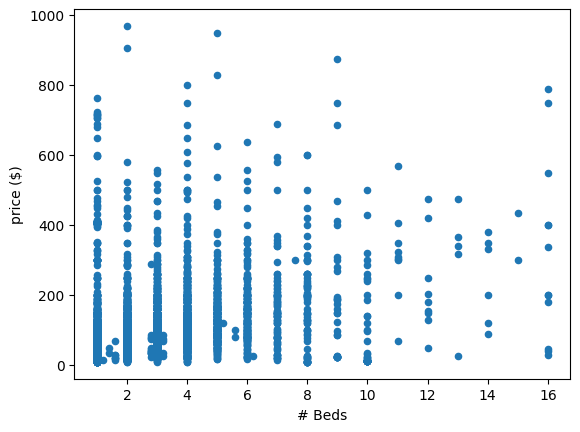

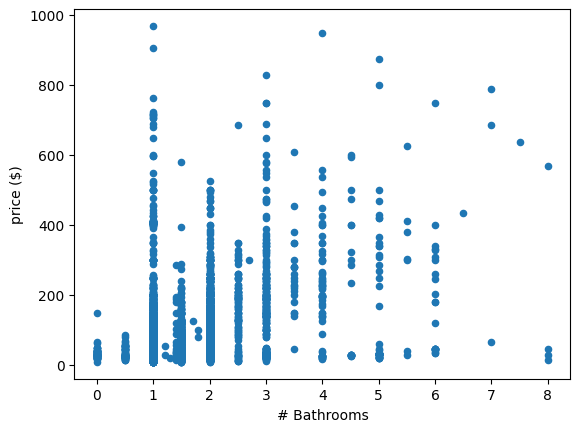

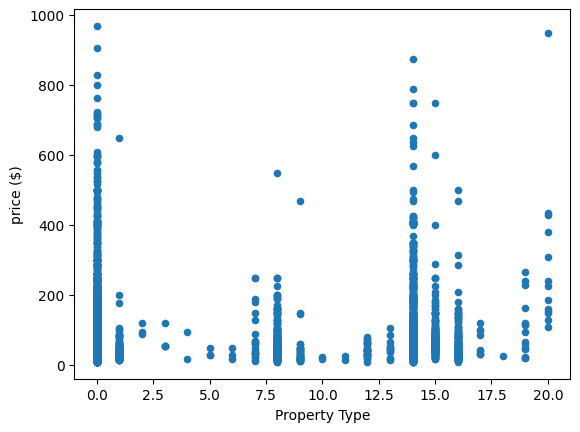

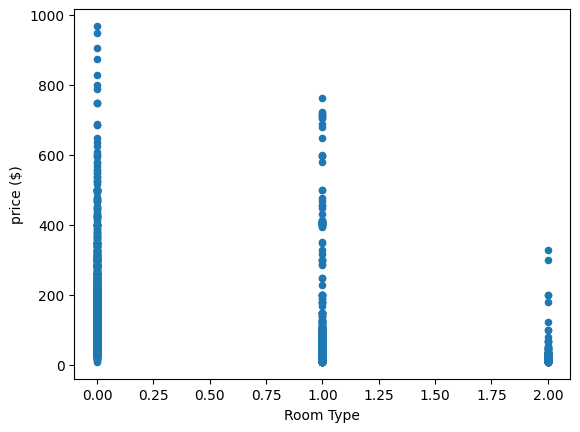

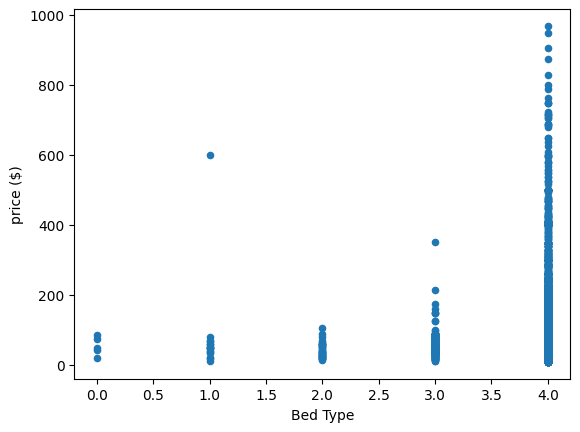

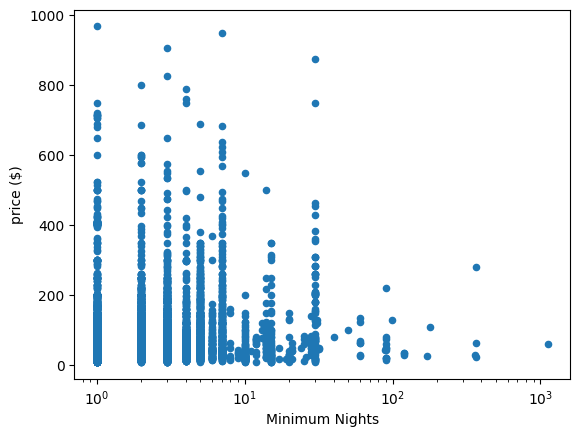

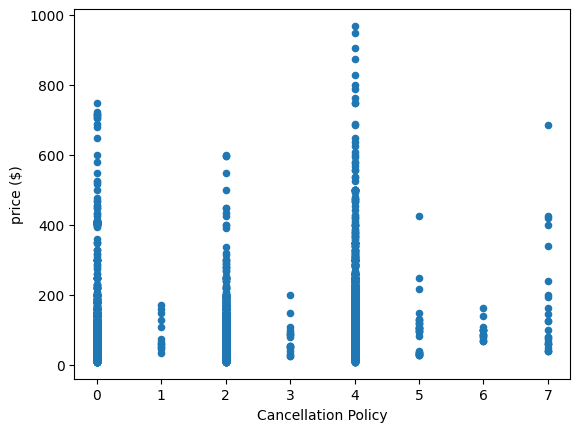

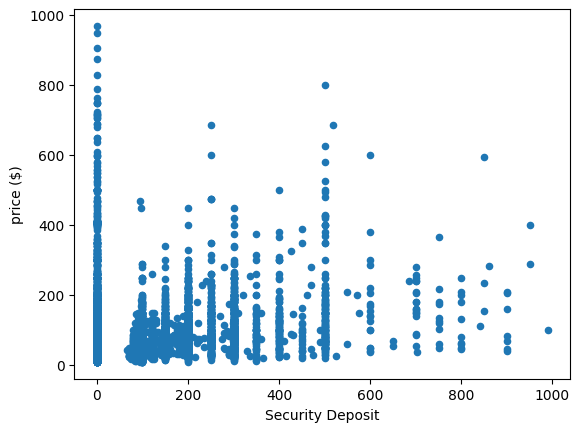

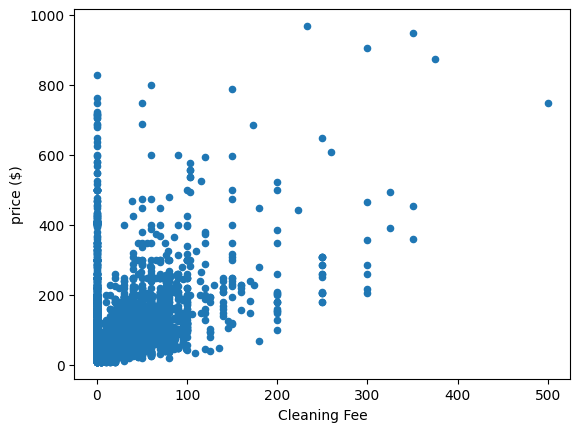

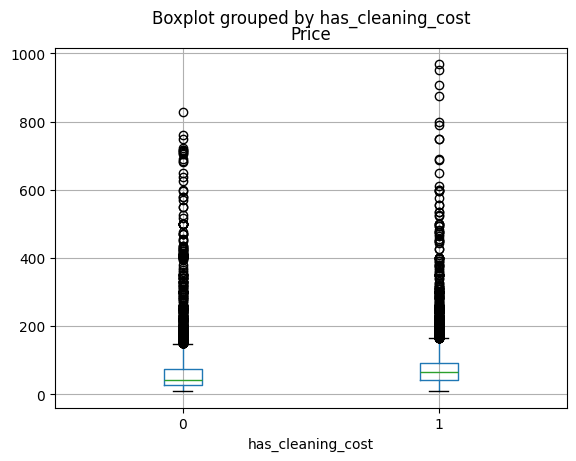

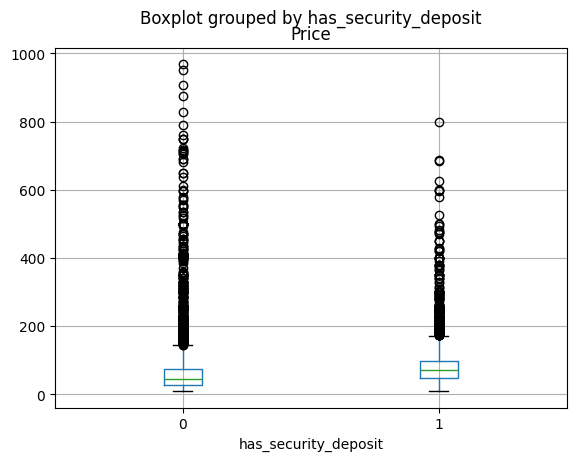

In [120]:
# Vamos a visutalizar respeto a la variable 'Price'

# Observamos que hay mucha variación de precios en cada país. Tiene algunos outliners
airbnb_train_data.plot(kind = 'scatter',x='country_code_type_encoded',y = 'Price')
plt.xlabel('Country Code')
plt.ylabel('price ($)')
plt.show()

# Observamos que tenemos precios y alto en todos los años
airbnb_train_data.plot(kind = 'scatter',x='host_year',y = 'Price')
plt.xlabel('host_year')
plt.ylabel('price ($)')
plt.show()

# Observamos que los precios pueden variar en el mismo número de personas pero se alcanza a ver una una relación de que a mayor huespedes mayor precio. Observamos algunos outliners
airbnb_train_data.plot(kind = 'scatter',x='Accommodates',y = 'Price')
plt.xlabel('# Accommodates')
plt.ylabel('price ($)')
plt.show()

# Podemos observar que a mas dormitorio en general es mayor precio. La mayoria tienen pocos dormitorios
airbnb_train_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('price ($)')
plt.show()

# Igual que en otras variables se observa un corportamiento donde a mayor cantidad de cama mayor precio, aunque existen algunos casos en los que varian.
airbnb_train_data.plot(kind = 'scatter',x='Beds',y = 'Price')
plt.xlabel('# Beds')
plt.ylabel('price ($)')
plt.show()

# Igual que en otras variables se observa un corportamiento donde a mayor cantidad de baños mayor precio, aunque existen algunos casos en los que varian.
airbnb_train_data.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()

# Observamos que ciertos tipos de propiedad tiene muchos alojamientos con diferentes precios como la 0 y la 15
airbnb_train_data.plot(kind = 'scatter',x='property_type_encoded',y = 'Price')
plt.xlabel('Property Type')
plt.ylabel('price ($)')
plt.show()

# El rango de precios varia entre los tipos de habitación.
airbnb_train_data.plot(kind = 'scatter',x='room_type_encoded',y = 'Price')
plt.xlabel('Room Type')
plt.ylabel('price ($)')
plt.show()

# La mayoria d elos precios se concentran en la categoría 4.
airbnb_train_data.plot(kind = 'scatter',x='bed_type_encoded',y = 'Price')
plt.xlabel('Bed Type')
plt.ylabel('price ($)')
plt.show()

# La mayoria de los alojamientos exigen menos noches, al aumentar el minimo de noches existen menos alojamientos.
airbnb_train_data.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('Minimum Nights')
plt.xscale("log")
plt.ylabel('price ($)')
plt.show()

# En cada politica de cancelación los precios estan muy dispersos.
airbnb_train_data.plot(kind = 'scatter',x='cancellation_policy_type_encoded',y = 'Price')
plt.xlabel('Cancellation Policy')
plt.ylabel('price ($)')
plt.show()

# Los precios son muy variados según el importe de Depósito
airbnb_train_data.plot(kind = 'scatter',x='Security Deposit',y = 'Price')
plt.xlabel('Security Deposit')
plt.ylabel('price ($)')
plt.show()

# La mayoria de los alojamientos parece que no piden tarifa de limpieza, pero existen algunos muy altos, tambien observamos que cuanto más la tarifa de limpieza mas alto la tarifa de limpieza.
airbnb_train_data.plot(kind = 'scatter',x='Cleaning Fee',y = 'Price')
plt.xlabel('Cleaning Fee')
plt.ylabel('price ($)')
plt.show()

airbnb_train_data.boxplot(by='has_cleaning_cost',column = 'Price')
plt.show()

airbnb_train_data.boxplot(by='has_security_deposit',column = 'Price')
plt.show()



In [122]:
airbnb_train_data["host_year"].value_counts()

host_year
2015.0    2710
2016.0    2538
2014.0    2134
2013.0    1700
2012.0    1528
2017.0     584
2011.0     494
2010.0     124
2009.0       9
Name: count, dtype: int64

In [123]:
airbnb_train_data["has_cleaning_cost"].value_counts()

has_cleaning_cost
1    6973
0    4851
Name: count, dtype: int64

In [124]:
airbnb_train_data["has_security_deposit"].value_counts()

has_security_deposit
0    6774
1    5050
Name: count, dtype: int64

In [125]:
airbnb_train_data["Accommodates"].value_counts().sort_index()

Accommodates
1     1635
2     4227
3     1140
4     2614
5      554
6      943
7      175
8      267
9       59
10      98
11      19
12      43
13       3
14      12
15       4
16      31
Name: count, dtype: int64

In [126]:
airbnb_train_data["Security Deposit"].value_counts().sort_index()

Security Deposit
0.0      6774
66.0        1
70.0        8
75.0        4
76.0        1
         ... 
850.0       3
860.0       1
900.0       7
950.0       2
990.0       1
Name: count, Length: 115, dtype: int64

In [127]:
airbnb_train_data["Cleaning Fee"].value_counts().sort_index()

Cleaning Fee
0.0      4851
5.0       320
6.0        40
7.0        34
8.0        72
         ... 
350.0       3
375.0       1
400.0       1
500.0       2
662.0       1
Name: count, Length: 104, dtype: int64

In [128]:
airbnb_train_data.loc[airbnb_train_data["Cleaning Fee"] > 300, ["Beds","Bathrooms","Price","Cleaning Fee"]]

,Beds,Bathrooms,Price,Cleaning Fee
321,2.0,1.0,NaN,500.0
1753,5.0,3.5,455.0,350.0
2723,4.0,4.0,495.0,325.0
3009,2.0,1.0,392.0,325.0
3026,9.0,5.0,875.0,375.0
3206,5.0,4.0,950.0,350.0
7169,9.0,6.0,750.0,500.0
9517,4.0,1.0,NaN,662.0
10128,6.0,3.0,360.0,350.0
11200,15.0,5.0,NaN,400.0


In [129]:
airbnb_train_data["Bedrooms"].value_counts().sort_index()

Bedrooms
0.0      814
0.8        7
1.0     7808
1.4        3
2.0     2089
2.2        1
3.0      734
3.2        1
4.0      241
5.0       74
5.4        1
6.0       29
7.0        9
8.0        7
10.0       6
Name: count, dtype: int64

In [130]:
airbnb_train_data.loc[airbnb_train_data["Bedrooms"] > 8, ["Accommodates","Bedrooms","Beds","Bathrooms","Price"]]

,Accommodates,Bedrooms,Beds,Bathrooms,Price
1208,16,10.0,16.0,7.0,790.0
1540,1,10.0,16.0,6.0,40.0
4350,1,10.0,1.0,5.5,40.0
6818,16,10.0,16.0,6.0,180.0
7528,2,10.0,2.0,0.0,39.0
7725,16,10.0,16.0,3.0,750.0


In [131]:
airbnb_train_data["Bathrooms"].value_counts().sort_index()

Bathrooms
0.0      53
0.5      56
1.0    8853
1.2       2
1.3       1
1.4      21
1.5     450
1.7       1
1.8       2
2.0    1832
2.5      98
2.7       1
3.0     259
3.5      22
4.0      62
4.5      19
5.0      51
5.5       7
6.0      24
6.5       1
7.0       4
7.5       1
8.0       4
Name: count, dtype: int64

In [132]:
airbnb_train_data.loc[airbnb_train_data["Bathrooms"] > 6, ["Accommodates","Bedrooms", "Beds","Bathrooms","Price"]]

,Accommodates,Bedrooms,Beds,Bathrooms,Price
379,16,7.0,11.0,8.0,570.0
1208,16,10.0,16.0,7.0,790.0
3812,16,1.0,16.0,8.0,29.0
4142,10,1.0,1.2,8.0,15.0
5144,15,6.0,15.0,6.5,435.0
5775,15,6.0,6.0,7.5,638.0
7660,14,7.0,9.0,7.0,685.0
9422,2,1.0,16.0,8.0,45.0
9791,1,7.0,7.0,7.0,65.0
11053,12,8.0,8.0,7.0,NaN


In [133]:
airbnb_train_data["Beds"].value_counts().sort_index()

Beds
1.0     5862
1.2        1
1.4        2
1.6        7
2.0     3088
2.8       16
3.0     1317
3.2        5
4.0      737
5.0      317
5.2        1
5.6        2
6.0      188
6.2        1
7.0       83
7.6        1
8.0       77
9.0       33
10.0      42
11.0       9
12.0       9
13.0       5
14.0       6
15.0       3
16.0      12
Name: count, dtype: int64

In [134]:
airbnb_train_data.loc[airbnb_train_data["Beds"] >= 15, ["Accommodates","Bedrooms","Beds","Price"]]

,Accommodates,Bedrooms,Beds,Price
1208,16,10.0,16.0,790.0
1327,16,6.0,16.0,200.0
1540,1,10.0,16.0,40.0
1663,16,7.0,15.0,300.0
2553,16,5.0,16.0,338.0
3812,16,1.0,16.0,29.0
5144,15,6.0,15.0,435.0
5403,16,7.0,16.0,550.0
6818,16,10.0,16.0,180.0
7725,16,10.0,16.0,750.0


In [135]:
airbnb_train_data["Security Deposit"].value_counts().sort_index()

Security Deposit
0.0      6774
66.0        1
70.0        8
75.0        4
76.0        1
         ... 
850.0       3
860.0       1
900.0       7
950.0       2
990.0       1
Name: count, Length: 115, dtype: int64

In [136]:
airbnb_train_data["Cleaning Fee"].value_counts().sort_index()

Cleaning Fee
0.0      4851
5.0       320
6.0        40
7.0        34
8.0        72
         ... 
350.0       3
375.0       1
400.0       1
500.0       2
662.0       1
Name: count, Length: 104, dtype: int64

In [137]:
airbnb_train_data.loc[airbnb_train_data["Cleaning Fee"] > 300, ["Beds","Price","Cleaning Fee"]]

,Beds,Price,Cleaning Fee
321,2.0,NaN,500.0
1753,5.0,455.0,350.0
2723,4.0,495.0,325.0
3009,2.0,392.0,325.0
3026,9.0,875.0,375.0
3206,5.0,950.0,350.0
7169,9.0,750.0,500.0
9517,4.0,NaN,662.0
10128,6.0,360.0,350.0
11200,15.0,NaN,400.0


#### Eliminación de outliers

Para las variables de 'Bedrooms' y 'Bathrooms'

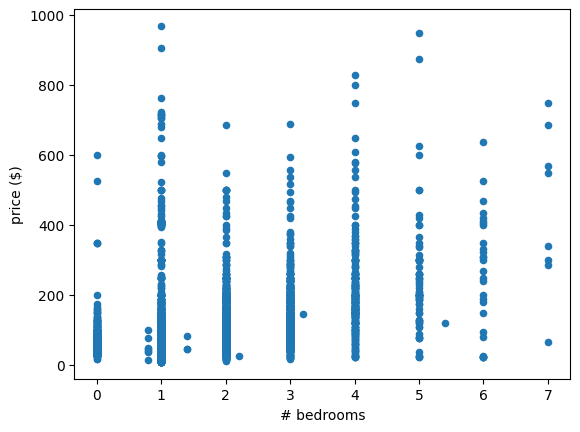

In [138]:
airbnb_train_data_no_outliers_bedrooms = airbnb_train_data.loc[airbnb_train_data['Bedrooms'] < 8] #cortamos las habitaciones apartir de 8 para quitar outliners

airbnb_train_data_no_outliers_bedrooms.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# bedrooms')
plt.ylabel('price ($)')
plt.show()

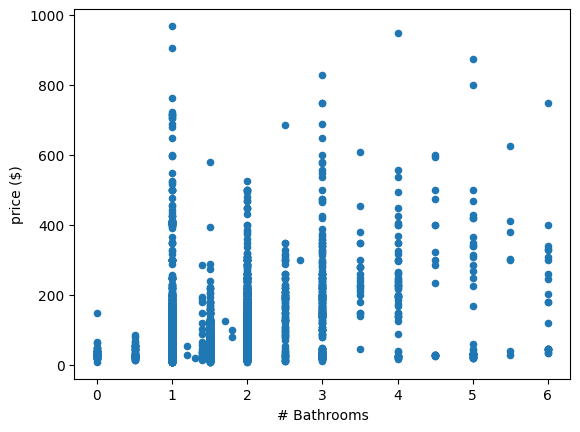

In [139]:
airbnb_train_data_no_outliers_bathrooms = airbnb_train_data.loc[airbnb_train_data['Bathrooms'] <= 6] #cortamos las habitaciones apartir de 6 para quitar outliners

airbnb_train_data_no_outliers_bathrooms.plot(kind = 'scatter',x='Bathrooms',y = 'Price')
plt.xlabel('# Bathrooms')
plt.ylabel('price ($)')
plt.show()


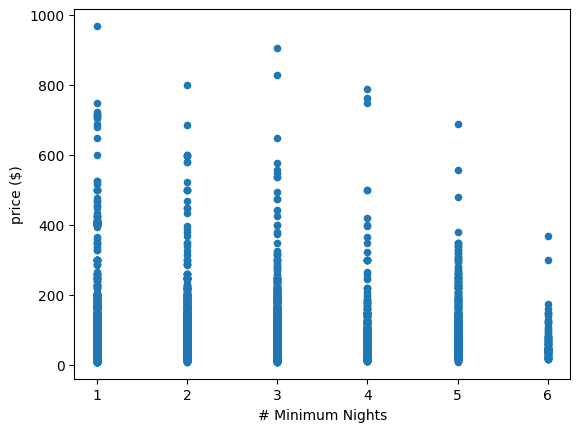

In [141]:
airbnb_train_data_no_minimum_nights = airbnb_train_data.loc[airbnb_train_data['Minimum Nights'] <= 6] #cortamos las habitaciones apartir de 6 para quitar outliners

airbnb_train_data_no_minimum_nights.plot(kind = 'scatter',x='Minimum Nights',y = 'Price')
plt.xlabel('# Minimum Nights')
plt.ylabel('price ($)')
plt.show()

Observemos si perdimos muchos datos en la eliminación

In [142]:
print(
    f'Original: {airbnb_train_data.shape[0]} // '
    f'Modificado: {airbnb_train_data_no_outliers_bedrooms.shape[0]}\nDiferencia: {airbnb_train_data.shape[0] - airbnb_train_data_no_outliers_bedrooms.shape[0]}'
)
print(f'Variación: {((airbnb_train_data.shape[0] - airbnb_train_data_no_outliers_bedrooms.shape[0])/airbnb_train_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11811
Diferencia: 13
Variación: 0.109946%


In [143]:
print(
    f'Original: {airbnb_train_data.shape[0]} // '
    f'Modificado: {airbnb_train_data_no_outliers_bathrooms.shape[0]}\nDiferencia: {airbnb_train_data.shape[0] - airbnb_train_data_no_outliers_bathrooms.shape[0]}'
)
print(f'Variación: {((airbnb_train_data.shape[0] - airbnb_train_data_no_outliers_bathrooms.shape[0])/airbnb_train_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11814
Diferencia: 10
Variación: 0.084574%


In [144]:
print(
    f'Original: {airbnb_train_data.shape[0]} // '
    f'Modificado: {airbnb_train_data_no_minimum_nights.shape[0]}\nDiferencia: {airbnb_train_data.shape[0] - airbnb_train_data_no_minimum_nights.shape[0]}'
)
print(f'Variación: {((airbnb_train_data.shape[0] - airbnb_train_data_no_minimum_nights.shape[0])/airbnb_train_data.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11061
Diferencia: 763
Variación: 6.452977%


#### Correlación

Evaluaremos las correlaciones entre las diferente variables. Habitualmente, si la correlación entre dos atributos es muy grande, es una fuente de error importante en algunos algoritmos de machine learning. 


In [145]:
airbnb_train_data.corr() # matriz de correlación

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Minimum Nights,country_code_type_encoded,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_type_encoded,host_year,has_cleaning_cost,has_security_deposit
Latitude,1.000000,-0.493585,0.006899,-0.006273,-0.010168,0.000509,-0.013221,0.010247,0.011566,0.004710,-0.003343,0.288359,-0.021714,-0.038782,-0.004842,0.013789,-0.013775,0.026345,-0.000820
Longitude,-0.493585,1.000000,0.018478,0.027138,0.039608,0.034264,0.004976,-0.024771,-0.046306,-0.007025,-0.004329,-0.666223,-0.034934,0.001742,0.031729,-0.011599,0.037262,-0.051323,-0.017663
Accommodates,0.006899,0.018478,1.000000,0.431324,0.721960,0.834334,0.528380,0.262034,0.339158,0.563493,0.006863,-0.016819,0.045907,-0.494338,0.036941,0.248781,-0.104371,0.193716,0.233915
Bathrooms,-0.006273,0.027138,0.431324,1.000000,0.524603,0.476080,0.379191,0.138404,0.192727,0.244478,0.030430,-0.017306,0.138349,-0.023891,0.045158,0.153776,-0.051666,0.005610,0.062690
Bedrooms,-0.010168,0.039608,0.721960,0.524603,1.000000,0.728043,0.492186,0.204751,0.294059,0.436859,0.020929,-0.022967,0.117925,-0.261698,0.068465,0.134395,-0.073964,0.088610,0.132635
Beds,0.000509,0.034264,0.834334,0.476080,0.728043,1.000000,0.437988,0.190519,0.264704,0.452644,0.007425,-0.033033,0.095511,-0.282799,0.058678,0.175497,-0.083054,0.094270,0.143577
Price,-0.013221,0.004976,0.528380,0.379191,0.492186,0.437988,1.000000,0.225914,0.431278,0.296850,0.029632,0.070400,0.082809,-0.365935,0.029350,0.145432,-0.075440,0.075488,0.110200
Security Deposit,0.010247,-0.024771,0.262034,0.138404,0.204751,0.190519,0.225914,1.000000,0.367665,0.214139,0.032053,0.037089,-0.035122,-0.309901,-0.010222,0.242655,-0.112810,0.312491,0.777460
Cleaning Fee,0.011566,-0.046306,0.339158,0.192727,0.294059,0.264704,0.431278,0.367665,1.000000,0.248308,0.073215,0.063245,-0.030437,-0.353842,0.011193,0.271831,-0.146188,0.549064,0.295356
Guests Included,0.004710,-0.007025,0.563493,0.244478,0.436859,0.452644,0.296850,0.214139,0.248308,1.000000,0.003419,0.003884,0.020977,-0.332621,0.029286,0.190006,-0.082038,0.222898,0.221566


Pero es mejor representarla:

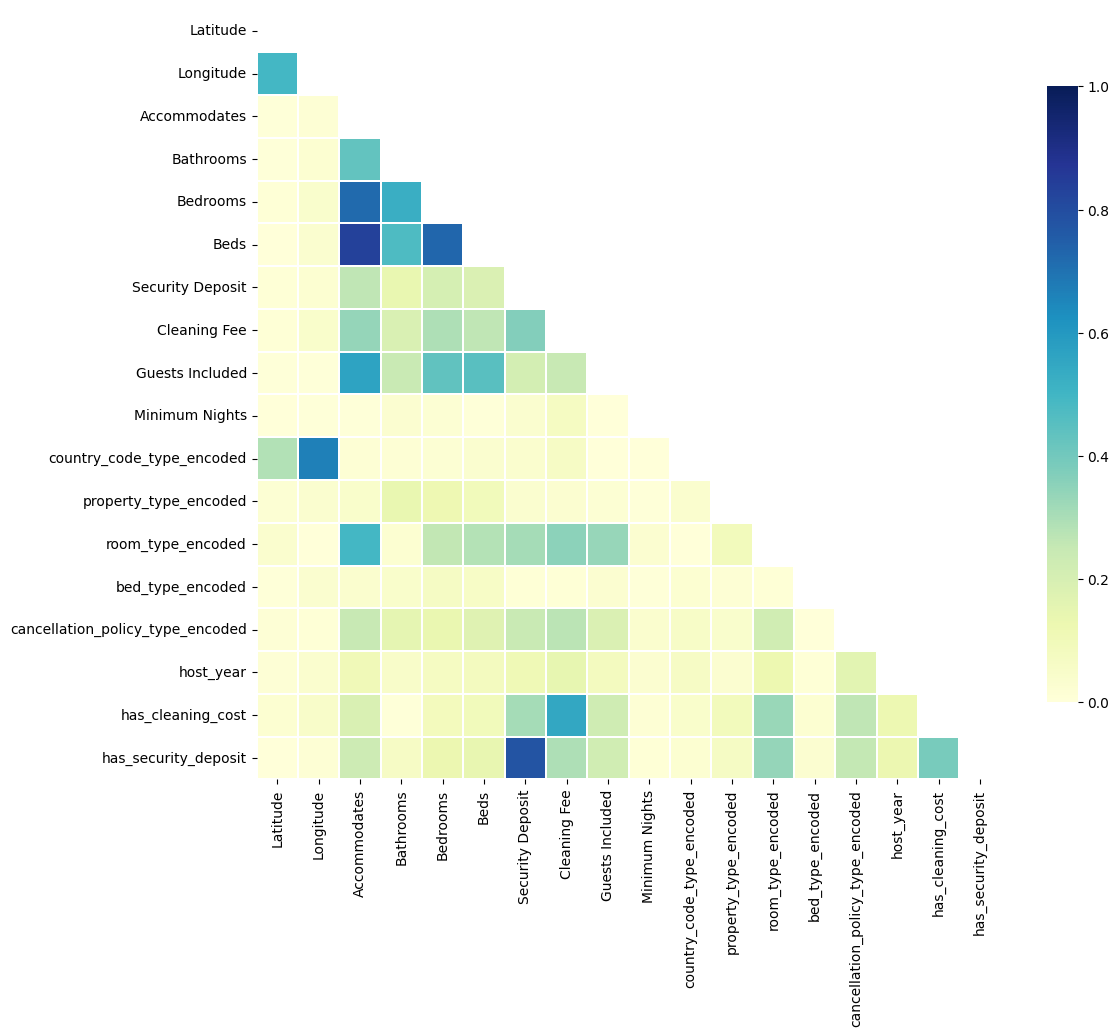

In [146]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(airbnb_train_data.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

# Eliminaremos la vairables 'Guests Included','Accommodates' y 'has_security_deposit' por tener mucha correlación

Por último, podemos hacer una representación (scatter_plot) de todas las variables frente al resto, para tener una idea de cómo se relacionan las variables del problema.

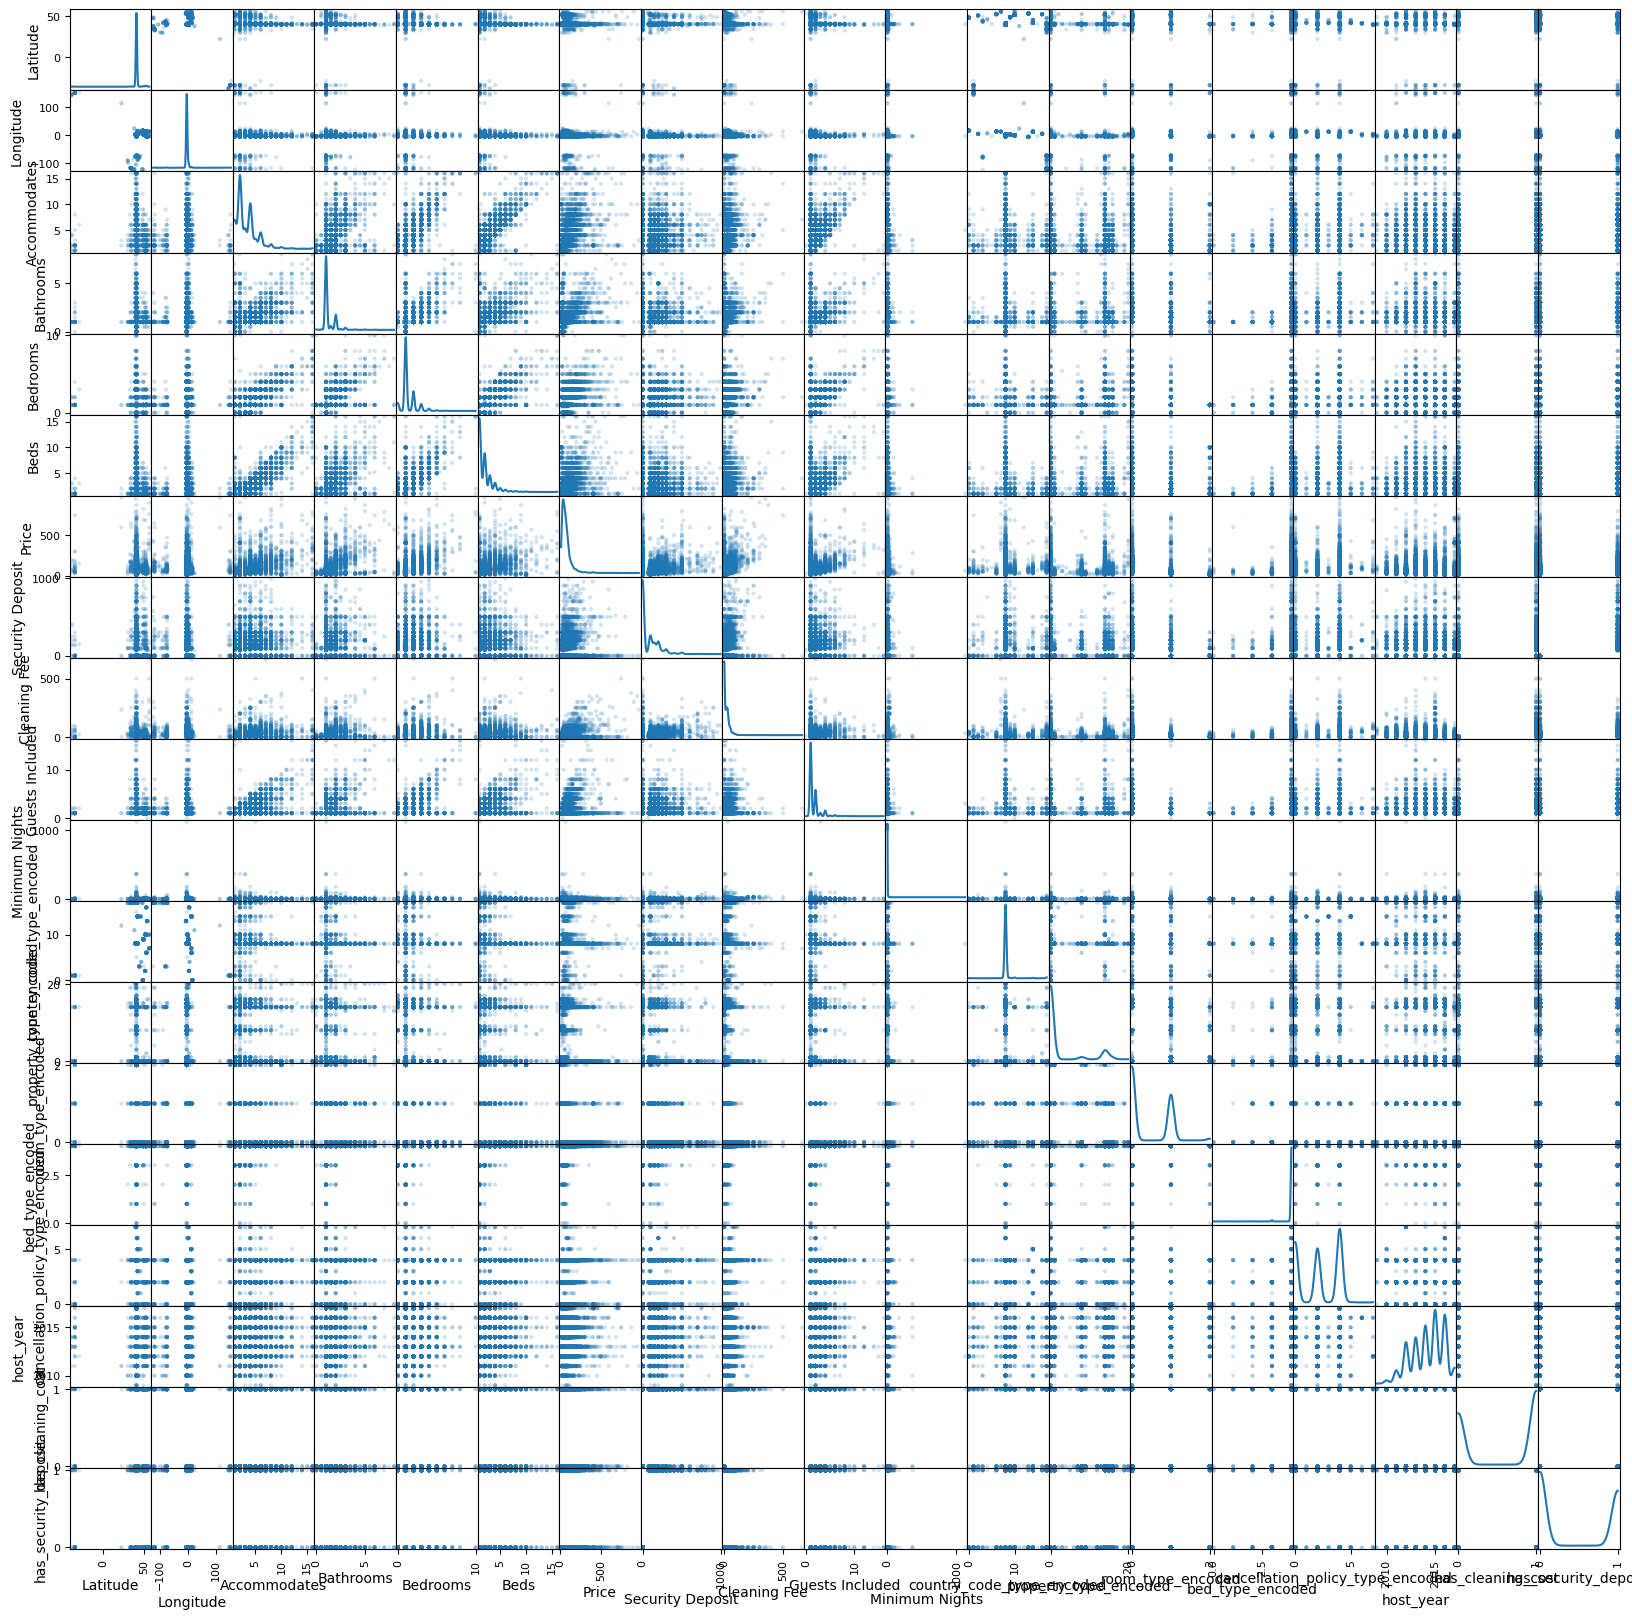

In [147]:
pd.plotting.scatter_matrix(airbnb_train_data, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()


## 3. Preprocesamiento

- Elimnación de varaibles
- Generación de nuevas características
- Cargar los datos nuevamente con todas las transformaciones


In [148]:

# Relación entre dormitorios y baños
airbnb_train_data['bed_bath_rooms'] = airbnb_train_data['Bedrooms']*airbnb_train_data['Bathrooms']

# Relación entre dormitorios y baños
airbnb_train_data['beds_bathrooms'] = airbnb_train_data['Beds']*airbnb_train_data['Bathrooms']



In [149]:
airbnb_train_data.head(5)

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,Guests Included,Minimum Nights,country_code_type_encoded,property_type_encoded,room_type_encoded,bed_type_encoded,cancellation_policy_type_encoded,host_year,has_cleaning_cost,has_security_deposit,bed_bath_rooms,beds_bathrooms
0,40.407732,-3.684819,4,1.0,1.0,2.0,60.0,0.0,25.0,1,2,8,0,0,4,2,2015.0,1,0,1.0,2.0
1,40.415802,-3.705340,4,1.0,1.0,2.0,50.0,0.0,15.0,1,1,8,0,0,4,0,2016.0,1,0,1.0,2.0
2,40.389048,-3.740374,1,1.5,1.0,8.0,10.0,0.0,5.0,1,3,8,0,2,4,2,2016.0,1,0,1.5,12.0
3,40.412814,-3.703052,2,3.0,1.0,1.0,30.0,0.0,0.0,1,10,8,0,1,4,4,2014.0,0,0,3.0,3.0
4,40.438631,-3.713716,2,1.0,1.0,1.0,32.0,0.0,0.0,1,1,8,0,1,4,4,2012.0,0,0,1.0,1.0


In [150]:
# Carga de datos
airbnb_train_data = pd.read_csv('./data/airbnb_train.csv', sep=';', decimal='.') 

# Modificar tipo.
airbnb_train_data['Host Since'] = pd.to_datetime(airbnb_train_data['Host Since']) 
airbnb_train_data['host_year'] = airbnb_train_data['Host Since'].dt.year 

# Eliminar nulos para poder escalor los datos
airbnb_train_data = airbnb_train_data.dropna(subset=['Price','Host Since'])

# Imputación

airbnb_train_data['Security Deposit'] = airbnb_train_data['Security Deposit'].fillna(0) 
airbnb_train_data['Cleaning Fee'] = airbnb_train_data['Cleaning Fee'].fillna(0) 

airbnb_train_data["Bathrooms"] = (airbnb_train_data["Bathrooms"] * 2).round() / 2
airbnb_train_data["Bedrooms"] = airbnb_train_data["Bedrooms"].round()
airbnb_train_data["Beds"] = airbnb_train_data["Beds"].round()

columns_imputar = ['Bathrooms','Bedrooms','Beds'] 
datos_a_imputar = airbnb_train_data[columns_imputar]

imputer = KNNImputer(n_neighbors=5)

datos_imputados = imputer.fit_transform(datos_a_imputar)

airbnb_train_data[columns_imputar] = pd.DataFrame(datos_imputados, columns=columns_imputar, index=airbnb_train_data.index)

# Nueva variable
airbnb_train_data['has_cleaning_cost'] = np.where(airbnb_train_data['Cleaning Fee'] == 0, 0, 1)

# Codificación
country_code_type = preprocessing.LabelEncoder()
country_code_type.fit(airbnb_train_data['Country Code'])
airbnb_train_data['country_code_type_encoded'] = country_code_type.transform(airbnb_train_data['Country Code'])

property_type = preprocessing.LabelEncoder()
property_type.fit(airbnb_train_data['Property Type'])
airbnb_train_data['property_type_encoded'] = property_type.transform(airbnb_train_data['Property Type'])

room_type = preprocessing.LabelEncoder()
room_type.fit(airbnb_train_data['Room Type']) 
airbnb_train_data['room_type_encoded'] = room_type.transform(airbnb_train_data['Room Type'])

bed_type = preprocessing.LabelEncoder()
bed_type.fit(airbnb_train_data['Bed Type']) 
airbnb_train_data['bed_type_encoded'] = bed_type.transform(airbnb_train_data['Bed Type'])

cancellation_policy_type = preprocessing.LabelEncoder()
cancellation_policy_type.fit(airbnb_train_data['Cancellation Policy']) 
airbnb_train_data['cancellation_policy_type_encoded'] = cancellation_policy_type.transform(airbnb_train_data['Cancellation Policy'])


# Eliminamos las columnas 
airbnb_train_data = airbnb_train_data.drop(['ID','Host Since','Property Type','Room Type','Bed Type','Cancellation Policy','Square Feet','Country Code','Amenities','Extra People','Has Availability','Neighbourhood','City','State','Zipcode','Country','Weekly Price','Monthly Price',
                                            'Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Guests Included','Accommodates'], axis=1)

# Eliminamos outliers,'Minimum Nights'
airbnb_train_data = airbnb_train_data[airbnb_train_data['Bedrooms'] < 8]
airbnb_train_data = airbnb_train_data[airbnb_train_data['Bathrooms'] <= 6]


# Generamos características
airbnb_train_data['bed_bath_rooms'] = airbnb_train_data['Bedrooms']*airbnb_train_data['Bathrooms']
airbnb_train_data['beds_bathrooms'] = airbnb_train_data['Beds']*airbnb_train_data['Bathrooms']

In [156]:
airbnb_train_data.head(3).T

,0,1,2
Latitude,40.407732,40.415802,40.389048
Longitude,-3.684819,-3.705340,-3.740374
Bathrooms,1.000000,1.000000,1.500000
Bedrooms,1.000000,1.000000,1.000000
Beds,2.000000,2.000000,8.000000
Price,60.000000,50.000000,10.000000
Security Deposit,0.000000,0.000000,0.000000
Cleaning Fee,25.000000,15.000000,5.000000
Minimum Nights,2.000000,1.000000,3.000000
host_year,2015.000000,2016.000000,2016.000000


In [152]:
# Confirmamos que no tengamos nulos
print(np.isfinite(airbnb_train_data).all().all()) 

True


Y ahora aplicamos las mismas transformaciones a test:

In [154]:
# Carga de datos
airbnb_test_data = pd.read_csv('./data/airbnnb_test.csv', sep=';', decimal='.')

# Modificar tipo.
airbnb_test_data['Host Since'] = pd.to_datetime(airbnb_test_data['Host Since']) 
airbnb_test_data['host_year'] = airbnb_test_data['Host Since'].dt.year 

# Eliminar nulos para poder escalor los datos
airbnb_test_data = airbnb_test_data.dropna(subset=['Price','Host Since'])

# Imputación

airbnb_test_data['Security Deposit'] = airbnb_test_data['Security Deposit'].fillna(0)
airbnb_test_data['Cleaning Fee'] = airbnb_train_data['Cleaning Fee'].fillna(0) 

airbnb_test_data["Bathrooms"] = (airbnb_test_data["Bathrooms"] * 2).round() / 2
airbnb_test_data["Bedrooms"] = airbnb_test_data["Bedrooms"].round()
airbnb_test_data["Beds"] = airbnb_test_data["Beds"].round()

columns_imputar = ['Bathrooms','Bedrooms','Beds'] 
datos_a_imputar = airbnb_test_data[columns_imputar]

imputer = KNNImputer(n_neighbors=5)

datos_imputados = imputer.fit_transform(datos_a_imputar)

airbnb_test_data[columns_imputar] = pd.DataFrame(datos_imputados, columns=columns_imputar, index=airbnb_test_data.index)

# Nueva variable
airbnb_test_data['has_cleaning_cost'] = np.where(airbnb_test_data['Cleaning Fee'] == 0, 0, 1)

# Codificación
country_code_type = preprocessing.LabelEncoder()
country_code_type.fit(airbnb_test_data['Country Code'])
airbnb_test_data['country_code_type_encoded'] = country_code_type.transform(airbnb_test_data['Country Code'])

property_type = preprocessing.LabelEncoder()
property_type.fit(airbnb_test_data['Property Type'])
airbnb_test_data['property_type_encoded'] = property_type.transform(airbnb_test_data['Property Type'])

room_type = preprocessing.LabelEncoder()
room_type.fit(airbnb_test_data['Room Type']) 
airbnb_test_data['room_type_encoded'] = room_type.transform(airbnb_test_data['Room Type'])

bed_type = preprocessing.LabelEncoder()
bed_type.fit(airbnb_test_data['Bed Type']) 
airbnb_test_data['bed_type_encoded'] = bed_type.transform(airbnb_test_data['Bed Type'])

cancellation_policy_type = preprocessing.LabelEncoder()
cancellation_policy_type.fit(airbnb_test_data['Cancellation Policy']) 
airbnb_test_data['cancellation_policy_type_encoded'] = cancellation_policy_type.transform(airbnb_test_data['Cancellation Policy'])


# Eliminamos las columnas 
airbnb_test_data = airbnb_test_data.drop(['ID','Host Since','Property Type','Room Type','Bed Type','Cancellation Policy','Square Feet','Country Code','Amenities','Extra People','Has Availability','Neighbourhood','City','State','Zipcode','Country','Weekly Price','Monthly Price',
                                            'Number of Reviews','Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Guests Included','Accommodates'], axis=1)

# Eliminamos outliers
airbnb_test_data = airbnb_test_data[airbnb_test_data['Bedrooms'] < 8]
airbnb_test_data = airbnb_test_data[airbnb_test_data['Bathrooms'] <= 6]


# Generamos características
airbnb_test_data['bed_bath_rooms'] = airbnb_test_data['Bedrooms']*airbnb_test_data['Bathrooms']
airbnb_test_data['beds_bathrooms'] = airbnb_test_data['Beds']*airbnb_test_data['Bathrooms']

In [155]:
airbnb_test_data.head(3).T

,0,1,2
Latitude,40.34632,40.414423,40.437012
Longitude,-3.69144,-3.712847,-3.698987
Bathrooms,1.00000,1.000000,1.000000
Bedrooms,1.00000,1.000000,1.000000
Beds,1.00000,1.000000,1.000000
Price,15.00000,25.000000,45.000000
Security Deposit,0.00000,175.000000,150.000000
Cleaning Fee,25.00000,15.000000,5.000000
Minimum Nights,1.00000,3.000000,1.000000
host_year,2016.00000,2015.000000,2012.000000


In [157]:
print(np.isfinite(airbnb_test_data).all().all())

False


## 4. Modelado

- Cross-validation
- Evaluación de resultados en train y test


Preparamos los datos para sklearn:

In [158]:
from sklearn import preprocessing

features = airbnb_train_data.columns.drop(['Price'])

# Dataset de train
X_train = airbnb_train_data[features].values
y_train = airbnb_train_data['Price'].values

# Dataset de test
y_test = airbnb_test_data['Price'].values    
X_test = airbnb_test_data[features].values 

Vamos a normalizar con los datos de train.

In [159]:
# Escalamos (con los datos de train) para tener todo en las mismas medidas.
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# En test se realiza con el scaler con los datos de train. 
XtestScaled = scaler.transform(X_test) 

In [160]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11786, 17)
Datos test:  (2950, 17)


Vamos a valorar diferentes métodos

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

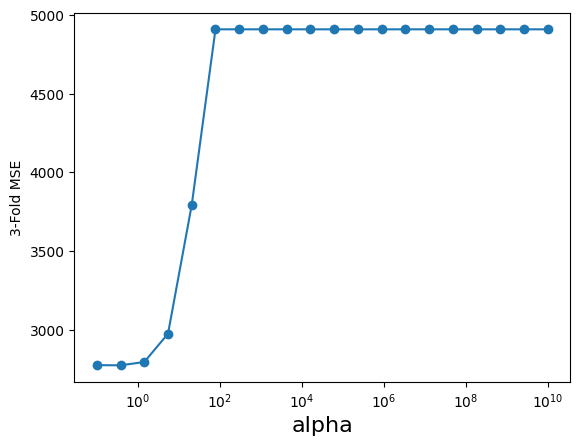

In [161]:
# Modelo de regresión Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()


In [162]:

from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

#Lo realizamos solo en train
ytrainLasso = lasso.predict(XtrainScaled)

mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))

feature_names = features # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

# Observamos que best mean cross-validation score: -2773.473
# Error cuadratico medio es de 2.75e+03
# La raiz del error cuadrático medio es 52.4 (Representa el eror promedio en las prediciones seria de 52.4 en el precio)

MSE Modelo Lasso (train): 2.75e+03
RMSE Modelo Lasso (train): 52.4
Latitude -0.6513259389912986
Longitude 3.6624650854812058
Bathrooms -0.32946956289661966
Bedrooms 0.0
Beds 2.4805077135654825
Security Deposit 0.7386442135215129
Cleaning Fee 24.790053673484014
Minimum Nights -0.3848253429311044
host_year 0.7977998905073739
has_cleaning_cost -14.654074762386768
country_code_type_encoded 6.825888151181354
property_type_encoded 1.479676225032044
room_type_encoded -16.159046442465748
bed_type_encoded -0.0
cancellation_policy_type_encoded -1.1215793982369013
bed_bath_rooms 25.17647947403988
beds_bathrooms -0.0


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.5s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.6s
[CV] END ........................................max_depth=4; total time=   0.7s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END .......................................

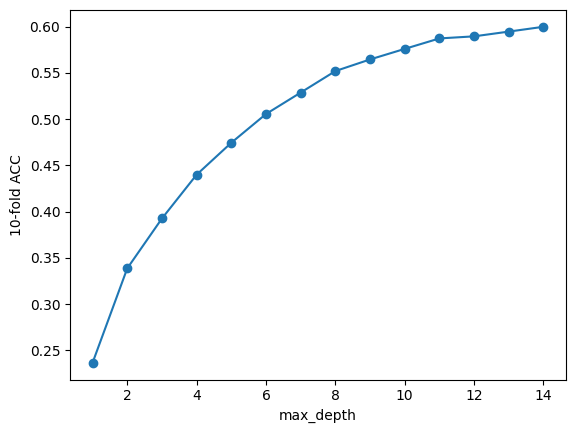

In [163]:
# Modelo de regresión Random Forest

from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) #200 estimadores
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [164]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

print("Train: ",randomForest.score(XtrainScaled,y_train))

# Observamos que best mean cross-validation score: 0.600
# R^2 es de 0.8537590449818938

Train:  0.8537590449818938


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=1; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=2; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=3; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................max_depth=4; total time=   0.0s
[CV] END ........................................

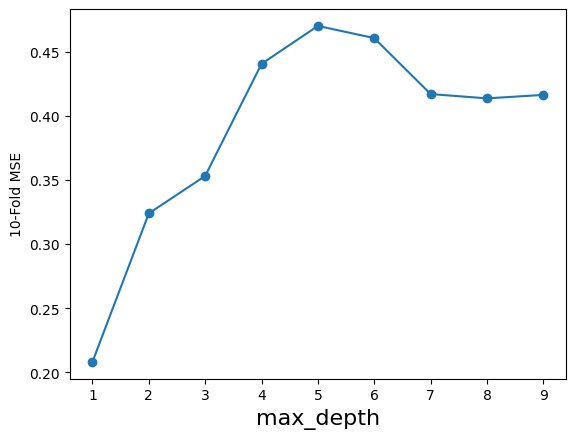

In [165]:
# Modelo de árbol de decisión individual

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

maxDepth = range(1,10) #exploramos
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_)) #vemos el cross, porque es regresión
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [166]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeRegressor(max_depth=maxDepthOptimo).fit(XtrainScaled,y_train)

print("Train: ",treeModel.score(XtrainScaled,y_train))

# Observamos que best mean cross-validation score: 0.470
# El R^2 es de 0.577473064921693


Train:  0.577473064921693


In [ ]:
# En conclusión podemos observar que el mejor modelo es Random Forest.
# El modelo de árbol de decisión es mejor que Lasso
# Lasso tiene menos poder predictivo

In [167]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

modelos = [
    ('Regresión Lineal', LinearRegression()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('Lasso', Lasso())
]

for nombre, modelo in modelos:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', modelo)
    ])
    scores = cross_val_score(pipeline, XtrainScaled, y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    print(f"{nombre} - MAE promedio: {-scores.mean():.2f} ± {scores.std():.2f}")

Regresión Lineal - MAE promedio: 26.30 ± 0.29
Random Forest - MAE promedio: 21.66 ± 0.55
SVR - MAE promedio: 26.08 ± 0.77
Lasso - MAE promedio: 26.16 ± 0.28


Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END .......................................

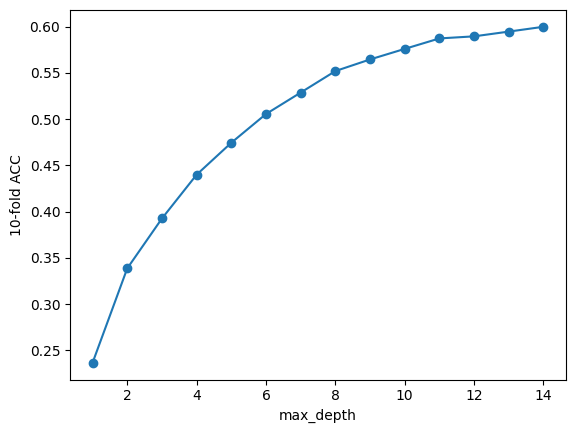

In [168]:
# el mejor es Random Fores dado que tiene su resultado más cercano a 1 Train: 0.8537590449818938 y el mean_absolute_error es menor Random Forest - MAE promedio: 21.66 ± 0.55, nos ofrece un margen de eror pequeño.

from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=100, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) #100 estimadores
grid.fit(XtrainScaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [169]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(XtrainScaled,y_train)

print("Train: ",randomForest.score(XtrainScaled,y_train))

Train:  0.8574803450501742


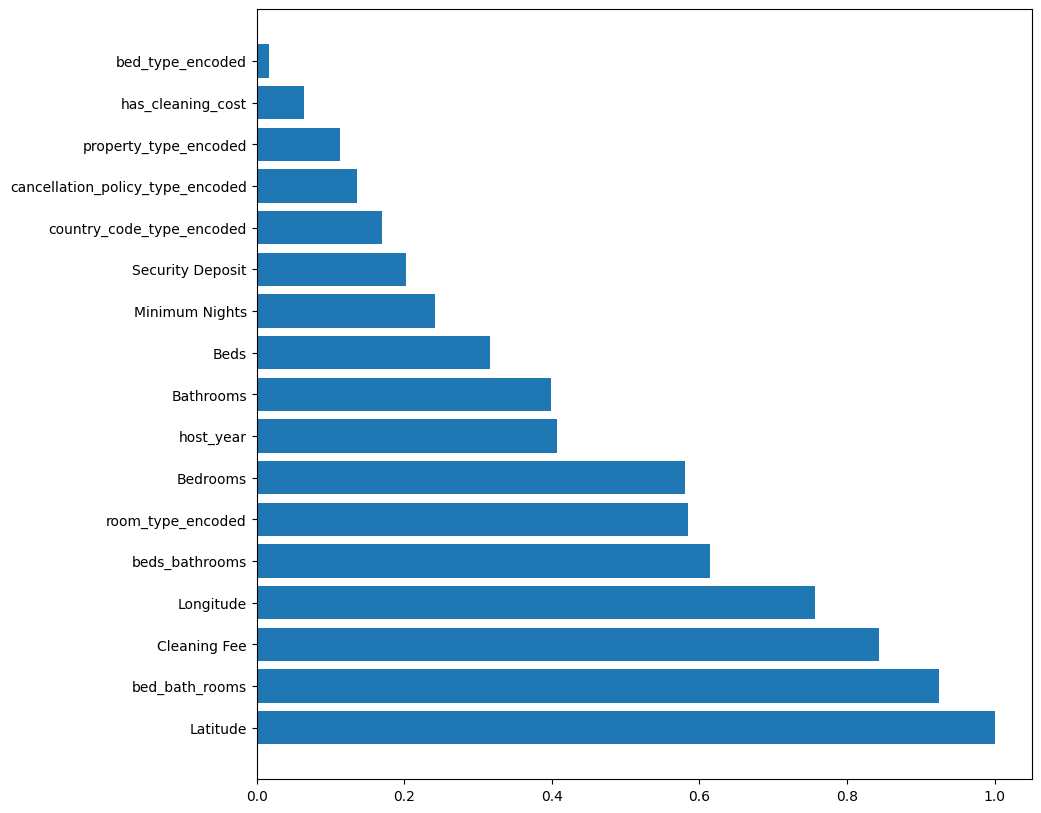

In [170]:
#vamos a valorar la importancia de cada variable

importances = randomForest.feature_importances_ #accedemos a las feature importances
importances = importances / np.max(importances) #escalamos

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(XtrainScaled.shape[1]),importances[indices])
plt.yticks(range(XtrainScaled.shape[1]),features[indices])
plt.show()

In [171]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=100,max_features='sqrt').fit(XtrainScaled,y_train)

print("Train: ",randomForest.score(XtrainScaled,y_train))
print("Test: ",randomForest.score(XtestScaled,y_test))

Train:  0.8513154400331933
Test:  0.48099772698232823


In [ ]:
## 5. Conclusión

Podemos observar que el modelo aprende bastante bien en el entrenamiento, pero al valorar con test observamos que no se mantiene, muestra una caida del 85% al 48%. 
En este caso podemos observar un overfitting, es decir que puede que ajustaramos demasiado los datos en el entrenamiento.
Pero apesar del overfitting el modelo es mejor que los otros con los que comparamos. Podríamos intentar evaluar nuevamente nuestra variables para reducirlas y eliminar ruido. 
Por ejemplo podriamos quitar las primeras variables del gráfico anterior que muestra menor importancia.
